# Dropping a ball
Written by Tim Atherton for Computational Physics 
January 17, 2019

Edited by Dalton Glenny and Theodore Pena.

Before anything, we import the libraries necessary for plotting and numerical work.

In [157]:
import matplotlib.pyplot as plt
import numpy as np
# from __future__ import division, print_function # Only nessecary in python 2

We now take extract experimental data from .csv files located in the notebook's local directory. Each of our computational simulations will be compared to this experimental data.

In [158]:
from scipy import interpolate
def listify(npa_pairs):
    return list(map(list, zip(*list(npa_pairs))))

cutoff = 0
ppb_actual = listify(np.genfromtxt('ping_pong_ball.csv', delimiter=',', names=True))
cutoff = ppb_actual[1].index(next(x for x in ppb_actual[1] if x < ppb_actual[1][0] * .99)) - 1
ppb_actual[0] = ppb_actual[0][cutoff:]
stime = ppb_actual[0][0]
ppb_actual[0] = list(map(lambda x: x - stime, ppb_actual[0]))
ppb_actual[1] = ppb_actual[1][cutoff:]

ppbInterp = interpolate.interp1d(ppb_actual[0], ppb_actual[1], fill_value='extrapolate')

ppb_actual_mass = 2.69 / 1000 #kg
    
sqsh_actual = listify(np.genfromtxt('squash_ball.csv', delimiter=',', names=True))
cutoff = sqsh_actual[1].index(next(x for x in sqsh_actual[1] if x < sqsh_actual[1][0] * .99)) - 1
sqsh_actual[0] = sqsh_actual[0][cutoff:]
stime = sqsh_actual[0][0]
sqsh_actual[0] = list(map(lambda x: x - stime, sqsh_actual[0]))
sqsh_actual[1] = sqsh_actual[1][cutoff:]

sqshInterp = interpolate.interp1d(sqsh_actual[0], sqsh_actual[1], fill_value='extrapolate')

sqsh_actual_mass = 24.26 / 1000 #kg

rb_actual = listify(np.genfromtxt('red_magic_ball.csv', delimiter=',', names=True))
cutoff = rb_actual[1].index(next(x for x in rb_actual[1] if x < rb_actual[1][0] * .99)) - 1
rb_actual[0] = rb_actual[0][cutoff:]
stime = rb_actual[0][0]
rb_actual[0] = list(map(lambda x: x - stime, rb_actual[0]))
rb_actual[1] = rb_actual[1][cutoff:]

rbInterp = interpolate.interp1d(rb_actual[0], rb_actual[1], fill_value='extrapolate')

rb_actual_mass = 0.66 / 1000 #kg

Here we set up our constants for the upcoming calculations.

In [159]:
g= -9.8 # Gravity constant in (metres per second sq.)

y0= 1.1 # Initial Height (in metres) Positive means upwards
v0= 0 # Initial Velocity (in metres per second)
t0= 0 # Initial Time (in s)

dt= .01 # Time resolution
tf= 10 # Total time to simulate

nsteps=int(tf/dt)+1 #note that we take the integer part

Next, we create arrays for time, velocity and position

In [160]:
t = np.linspace(t0,tf,nsteps)
euler_v = np.zeros([nsteps])
euler_y = np.zeros([nsteps])
analytic_y = np.zeros([nsteps])
ab_v = np.zeros([nsteps])
ab_y = np.zeros([nsteps])
ppb_v = np.zeros([nsteps])
ppb_y = np.zeros([nsteps])
mb_v = np.zeros([nsteps])
mb_y = np.zeros([nsteps])
sqsh_v = np.zeros([nsteps])
sqsh_y = np.zeros([nsteps])

Main loop, where we successively update velocity and time according to the Euler rule

In [161]:
euler_y[0] = y0
euler_v[0] = v0
for i in range(1,nsteps): #Calculates object's velocity and position for each change in time
    euler_v[i] = euler_v[i-1] - g * dt 
    euler_y[i] = euler_y[i-1] - euler_v[i-1] * dt 
    if euler_y[i] < 0: #Accounts for when object hits the ground
        euler_y[i] = 0
        euler_v[i] = -euler_v[i]

Analytic solution, using the solved diff eq for Newton's Second Law (without drag)

In [162]:
analytic_y[0] = y0
def analytic_sol(t, analytic_y, g, y0, v0, dt):
    for i in range(1,nsteps):
        analytic_y[i] = analytic_y[0] + (v0 * dt * i) + (.5 * g * dt * dt * i * i)

In [163]:
analytic_sol(t, analytic_y, g, y0, v0, dt)

Ping Pong Ball estimate, with coefficient of restitution

In [164]:
ppb_cor = .79
counter = 0
def ppb_euler(ppb_v, ppb_cor, ppb_y, euler_v, euler_y, g, dt):
    ppb_v[0] = euler_v[0]
    ppb_y[0] = euler_y[0]
    for i in range(1,nsteps): #Calculates object's velocity and position for each change in time
        ppb_v[i] = ppb_v[i-1] - (g * dt) 
        ppb_y[i] = ppb_y[i-1] - ppb_v[i-1] * dt 
        if ppb_y[i] <= 0: #Accounts for when object hits the ground
            ppb_y[i] = 0
            ppb_v[i] = -1 * ppb_cor * ppb_v[i]

In [165]:
ppb_euler(ppb_v, ppb_cor, ppb_y, euler_v, euler_y, g, dt)

Magic Ball (the red one) estimate, with coefficient of restitution

In [166]:
mb_cor = .4
def mb_euler(mb_v, mb_cor, mb_y, euler_v, euler_y, g, dt):
    mb_v[0] = euler_v[0]
    mb_y[0] = euler_y[0]
    for i in range(1,nsteps): #Calculates object's velocity and position for each change in time
        mb_v[i] = mb_v[i-1] - (g * dt) 
        mb_y[i] = mb_y[i-1] - mb_v[i-1] * dt 
        if mb_y[i] <= 0: #Accounts for when object hits the ground
            mb_y[i] = 0
            mb_v[i] = -mb_cor * mb_v[i]

In [167]:
mb_euler(mb_v, mb_cor, mb_y, euler_v, euler_y, g, dt)

Squash Ball estimate, with coefficient of restitution

In [168]:
sqsh_cor = .43
def sqsh_euler(sqsh_v, sqsh_cor, sqsh_y, euler_v, euler_y, g, dt):
    sqsh_v[0] = euler_v[0]
    sqsh_y[0] = euler_y[0]
    for i in range(1,nsteps): #Calculates object's velocity and position for each change in time
        sqsh_v[i] = sqsh_v[i-1] - (g * dt) 
        sqsh_y[i] = sqsh_y[i-1] - sqsh_v[i-1] * dt 
        if sqsh_y[i] <= 0: #Accounts for when object hits the ground
            sqsh_y[i] = 0
            sqsh_v[i] = -sqsh_cor * sqsh_v[i]

In [169]:
sqsh_euler(sqsh_v, sqsh_cor, sqsh_y, euler_v, euler_y, g, dt)

Adams-Bashforth Solution

In [170]:
def ab_solution(ab_v, ab_y, y0, v0, dt, g, euler_y, cor):
    ab_y[0] = y0
    ab_y[1] = euler_y[1]
    ab_v[0] = v0
    for i in range(2,nsteps): 
        ab_v[i] = ab_v[i-1] - (g * dt) 
        ab_y[i] = ab_y[i-1] - (1.5 * dt * ab_v[i-1]) + (.5 * dt * ab_v[i-2]) 
        if ab_y[i] <= 0: 
            ab_y[i] = 0
            ab_v[i] = -cor * ab_v[i]

In [171]:
ab_solution(ab_v, ab_y, y0, v0, dt, g, euler_y, ppb_cor) 

At this point, the only step left is to visualize our results.

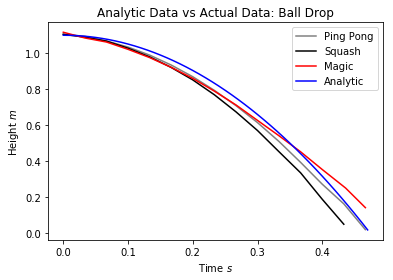

In [172]:
plt.plot(ppb_actual[0][0:15],ppb_actual[1][0:15], color = 'gray', label = 'Ping Pong')
plt.plot(sqsh_actual[0][0:14],sqsh_actual[1][0:14], color = 'black', label = 'Squash')
plt.plot(rb_actual[0][0:15],rb_actual[1][0:15], color = 'red', label = 'Magic')
plt.plot(t[0:48],analytic_y[0:48], color = 'blue', label = 'Analytic')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.legend()
plt.title('Analytic Data vs Actual Data: Ball Drop')
plt.show()

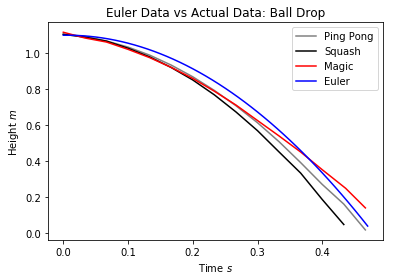

In [173]:
plt.plot(ppb_actual[0][0:15],ppb_actual[1][0:15], color = 'gray', label = 'Ping Pong')
plt.plot(sqsh_actual[0][0:14],sqsh_actual[1][0:14], color = 'black', label = 'Squash')
plt.plot(rb_actual[0][0:15],rb_actual[1][0:15], color = 'red', label = 'Magic')
plt.plot(t[0:48],euler_y[0:48], color = 'blue', label = 'Euler')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.legend()
plt.title('Euler Data vs Actual Data: Ball Drop')
plt.show()

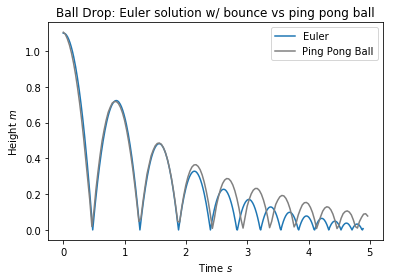

In [174]:
plt.plot(t[0:490],ppb_y[0:490], label='Euler')
plt.plot(ppb_actual[0][0:150],ppb_actual[1][0:150], color = 'gray', label = 'Ping Pong Ball')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.legend()
plt.title('Ball Drop: Euler solution w/ bounce vs ping pong ball')
plt.show()

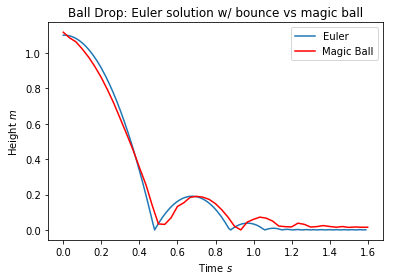

In [175]:
plt.plot(t[0:160],mb_y[0:160], label='Euler')
plt.plot(rb_actual[0][0:150],rb_actual[1][0:150], color = 'red', label = 'Magic Ball')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.title('Ball Drop: Euler solution w/ bounce vs magic ball')
plt.legend()
plt.show()

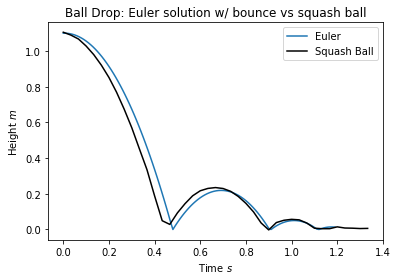

In [176]:
plt.plot(t[0:120],sqsh_y[0:120], label='Euler')
plt.plot(sqsh_actual[0][0:150],sqsh_actual[1][0:150], color = 'black', label = 'Squash Ball')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.title('Ball Drop: Euler solution w/ bounce vs squash ball')
plt.legend()
plt.show()

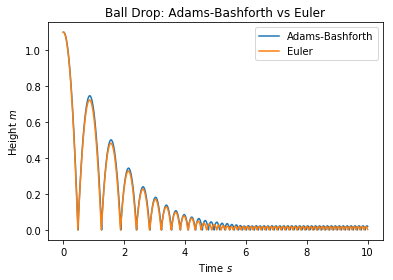

In [177]:
plt.plot(t,ab_y, label='Adams-Bashforth')
plt.plot(t,ppb_y, label='Euler')
plt.xlabel('Time $s$')
plt.ylabel('Height $m$')
plt.title('Ball Drop: Adams-Bashforth vs Euler')
plt.legend()
plt.show()

To calculate error, we define a function that creates a new vector, "diff". Diff is a vector consisting of the absolute error between vec_1 and vec_2 for each $\delta t$.

In [178]:
def relative_error(t, vec_1, vec_2):
    
    if ( len(vec_1) <= len(vec_2) ):
        diff=np.zeros([len(vec_1)])
    elif ( len(vec_2) < len(vec_1)):
        diff=np.zeros([len(vec_2)])
    
    for i in range(1,nsteps):
        diff[i] = np.abs((vec_1[i]-vec_2[i]))
    
    plt.plot(t[0:len(diff)], diff)
    plt.xlabel('Time $s$')
    plt.ylabel("Absolute error of given vectors")
    plt.title("Absolute Error: Adams-Bashforth vs Euler Analysis of the Ping Pong Ball")
    plt.show()

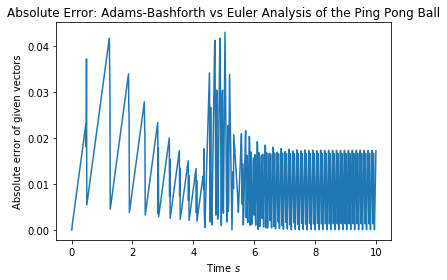

In [179]:
relative_error(t, ppb_y, ab_y)